**This Notebook analyse cancer data, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.Using Supervised learning draw inference on the class attribute.**

**Read the csv file and take 10 samples**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Cancer_Data.csv")
df.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


**Get the information about dataframe**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Drop the unnecesary columns from the dataframe**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Cancer_Data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Using Seaborn data visualization draw countplot to investigate diagnosis column because it is our dependent variable**

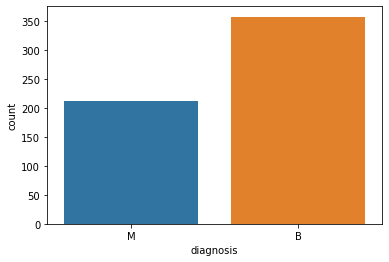

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Cancer_Data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

sns.countplot(df['diagnosis'],label=['count'])

**M: Malignant B:Benign Tumor celss converted into categorical values 1 and 0**

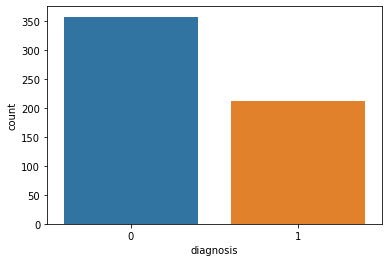

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Cancer_Data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
sns.countplot(df['diagnosis'],label=['count'])

In [13]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**We have to seperate dependent variable and indipendent variable** <br>
    x- independent variable <br>
    y- dependent variables 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Cancer_Data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
independent_var=[x for x in df.columns if 'mean' in x]
x=df[independent_var]
y=df['diagnosis']

**Devide data into training and testing data**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df=pd.read_csv("Cancer_Data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

#Maping values
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

#extracting dependent and independent variable
independent_var=[x for x in df.columns if 'mean' in x]
x=df[independent_var]
y=df['diagnosis']

#Trainig and Testing 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1010)

In [31]:
train_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
416,9.405,21.70,59.60,271.2,0.10440,0.06159,0.020470,0.012570,0.2025,0.06601
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.032510,0.1641,0.05764
309,13.050,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518
86,14.480,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,0.2075,0.05636


In [33]:
test_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
158,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.019630,0.1590,0.05907
267,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.021420,0.1635,0.05859
388,11.27,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.027570,0.1810,0.07252
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,0.1714,0.06340
442,13.78,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,0.1405,0.05848


In [39]:
train_y

416    0
73     1
395    0
309    0
86     1
      ..
534    0
501    1
18     1
202    1
548    0
Name: diagnosis, Length: 398, dtype: int64

In [40]:
test_y

158    0
267    0
388    0
411    0
442    0
      ..
527    0
566    1
567    1
248    0
64     1
Name: diagnosis, Length: 171, dtype: int64

after training an testing below three steps has to be done <br>
1. Initialize the model
2. fit your data on the model object
3. predict outcome using model object

other steps <br>
1. fitness of our model
2. Evaluate the performance of model

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

df=pd.read_csv("Cancer_Data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

#Maping values
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

#extracting dependent and independent variable
independent_var=[x for x in df.columns if 'mean' in x]
x=df[independent_var]
y=df['diagnosis']

#Trainig and Testing 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1010)

# Initialize all the model
model_logreg=LogisticRegression()
model_DT=DecisionTreeClassifier()
model_RF=RandomForestClassifier()
model_MNB=MultinomialNB()
model_svm_linear=SVC(kernel='linear')
model_svm_poly=SVC(kernel='poly')
model_svm_rbf=SVC(kernel='rbf')

# Fit the model
model_logreg=model_logreg.fit(train_x,train_y)
model_DT=model_DT.fit(train_x,train_y)
model_MNB=model_MNB.fit(train_x,train_y)
model_RF=model_RF.fit(train_x,train_y)
model_svm_linear=model_svm_linear.fit(train_x,train_y)
model_svm_poly=model_svm_poly.fit(train_x,train_y)
model_svm_rbf=model_svm_rbf.fit(train_x,train_y)

# prediction 
pred_logreg=model_logreg.predict(test_x)
pred_DT=model_DT.predict(test_x)
pred_MNB=model_MNB.predict(test_x)
pred_RF=model_RF.predict(test_x)
pred_svm_linear=model_svm_linear.predict(test_x)
pred_svm_poly=model_svm_poly.predict(test_x)
pred_svm_rbf=model_svm_rbf.predict(test_x)

C:\Users\Raghu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

df=pd.read_csv("Cancer_Data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

#Maping values
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

#extracting dependent and independent variable
independent_var=[x for x in df.columns if 'mean' in x]
x=df[independent_var]
y=df['diagnosis']

#Trainig and Testing 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1010)

# Initialize all the model
model_logreg=LogisticRegression()
model_DT=DecisionTreeClassifier()
model_RF=RandomForestClassifier()
model_MNB=MultinomialNB()
model_svm_linear=SVC(kernel='linear')
model_svm_poly=SVC(kernel='poly')
model_svm_rbf=SVC(kernel='rbf')

# Fit the model
model_logreg=model_logreg.fit(train_x,train_y)
model_DT=model_DT.fit(train_x,train_y)
model_MNB=model_MNB.fit(train_x,train_y)
model_RF=model_RF.fit(train_x,train_y)
model_svm_linear=model_svm_linear.fit(train_x,train_y)
model_svm_poly=model_svm_poly.fit(train_x,train_y)
model_svm_rbf=model_svm_rbf.fit(train_x,train_y)

# prediction 
pred_logreg=model_logreg.predict(test_x)
pred_DT=model_DT.predict(test_x)
pred_MNB=model_MNB.predict(test_x)
pred_RF=model_RF.predict(test_x)
pred_svm_linear=model_svm_linear.predict(test_x)
pred_svm_poly=model_svm_poly.predict(test_x)
pred_svm_rbf=model_svm_rbf.predict(test_x)

acc_tab=pd.DataFrame({
    'Model Name':['Logistic Regression','Decision Tree','Random Forest','Gaussian Naive Bayes','SVM-Linear'],
'Train_Accuracy':[model_logreg.score(train_x,train_y)*100,model_DT.score(train_x,train_y)*100,
                  model_MNB.score(train_x,train_y)*100,model_RF.score(train_x,train_y)*100,model_svm_linear.score(train_x,train_y)*100],
'Test_Accuracy':[model_logreg.score(train_x,train_y)*100,model_DT.score(train_x,train_y)*100,
                  model_MNB.score(train_x,train_y)*100,model_RF.score(train_x,train_y)*100,model_svm_linear.score(train_x,train_y)*100]})
acc_tab

C:\Users\Raghu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model Name,Train_Accuracy,Test_Accuracy
0,Logistic Regression,91.457286,91.457286
1,Decision Tree,100.000000,100.000000
2,Random Forest,83.165829,83.165829
3,Gaussian Naive Bayes,100.000000,100.000000
4,SVM-Linear,92.211055,92.211055


from the above table it gives clear picture that Decision Tree an Gaussian Naive Bayes are over fitted and best model for data for the cancer cell is Logistic Regression and SVM-Classifier 